In [15]:
import pandas as pd
df = pd.read_csv('./new_data/total_data.csv')
df = df.loc[:, df.columns != df.columns[1]]

In [ ]:
calculate = df.corr(method="pearson")[['WTI Real Price (GDP Deflated)']]

print(calculate)

In [ ]:
from IPython.display import display
display(calculate)

In [18]:
target = df['WTI Real Price (GDP Deflated)']

In [ ]:
move_col = df.columns[17]
new_oder = [move_col] + [col for col in df.columns if col != move_col]
df = df[new_oder]

df.isna().sum()

In [91]:
df.iloc[54:59]

,WTI Real Price (GDP Deflated),Unnamed: 0,year,Inventory Change,Spread Change,World Consumption Change,World GDP Change,Assets under management (four largest public U.S. commodity funds),Dow Jones UBS Commodity Index,Open Interest,non-OECD Consumption Growth,non-OECD GDP growth,non-OPEC Production change,y-o-y % OECD Consumption Change,Spare Capacity,Saudi Production Change,WTI Production Change,Capacity percent change
70,63.84,70,2019,72.52,-0.51,0.82,2.99,-39.78,-8.71,2051.239,1.41,2.99,1.31,0.17,2.28,-1.10,-19.14,-0.42
71,64.20,71,2019,16.55,-8.12,0.77,2.61,-28.24,5.44,2132.981,1.41,2.61,1.66,0.06,2.07,-0.90,-4.58,0.61
72,50.97,72,2020,111.36,15.86,-6.64,-1.31,-56.02,-23.71,2196.411,-8.07,-1.31,2.32,-5.08,2.78,-0.20,-17.31,1.46
73,31.54,73,2020,288.42,3.57,-13.99,-8.46,-44.85,-18.43,2197.121,-8.12,-8.46,-4.08,-20.58,5.22,-0.64,-53.30,-5.18
74,45.72,74,2020,242.72,6.01,-9.44,-1.99,-22.33,-8.91,2032.424,-6.74,-1.99,-4.04,-12.42,6.72,-0.61,-27.44,-4.57


In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

# %%
df = df.dropna()

# %%
# 데이터 분리
X_cleaned = df.iloc[:, 3:]
y_cleaned = df.iloc[:, 0]

In [69]:
scaler = MinMaxScaler()
X_cleaned_scaled = (scaler.fit_transform(X_cleaned))
y_cleaned_scaled = (scaler.fit_transform(pd.DataFrame(y_cleaned)))

In [110]:
y_cleaned

16     89.88
17     99.17
18     98.56
19     83.42
20     80.03
       ...  
80     97.56
81    109.19
82     92.26
83     81.22
84     73.96
Name: WTI Real Price (GDP Deflated), Length: 69, dtype: float64

In [111]:
X_train_cleaned = X_cleaned_scaled[:61]
X_test_cleaned = X_cleaned_scaled[61:]
y_train_cleaned = y_cleaned_scaled[:61]
y_test_cleaned = y_cleaned_scaled[61:]

In [112]:
param_grid = {
    'C' : [0.1, 1, 10, 100, 1000],
    'epsilon' : [0.01, 0.1, 0.5, 1.0],
    'kernel' : ['rbf']
}

grid_search = GridSearchCV(SVR(), param_grid, cv = 5, scoring = "neg_mean_absolute_error", n_jobs = -1)
grid_search.fit(X_train_cleaned, y_train_cleaned)

c:\Users\kbh11\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.01, 0.1, 0.5, 1.0], 'kernel': ['rbf']},
             scoring='neg_mean_absolute_error')

In [113]:
svr_model = SVR(C=1, epsilon=0.01, kernel='rbf')
svr_model.fit(X_train_cleaned, y_train_cleaned)

c:\Users\kbh11\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, epsilon=0.01)

In [114]:
y_cleaned_pred = svr_model.predict(X_test_cleaned)

In [115]:
y_cleaned_pred

array([0.29133312, 0.43856166, 0.49729217, 0.50575279, 0.63170667,
       0.7286713 , 0.7059577 , 0.46124416])

In [116]:
y_test_cleaned

array([[0.2957809 ],
       [0.32264989],
       [0.36484086],
       [0.48867506],
       [0.57475944],
       [0.44944486],
       [0.36772761],
       [0.31398964]])

In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

mae = mean_absolute_error(y_test_cleaned, y_cleaned_pred)
mse = mean_squared_error(y_test_cleaned, y_cleaned_pred)
r2 = r2_score(y_test_cleaned, y_cleaned_pred)
# accuracy = accuracy_score(y_test_cleaned, y_cleaned_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.1364
Mean Squared Error (MSE): 0.0311
R² Score: -2.6932


In [118]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 한글 폰트 설정 (나눔고딕 or 다른 폰트)
plt.rc('font', family='Malgun Gothic')  # Windows의 경우 'Malgun Gothic' 사용
# plt.rc('font', family='AppleGothic')  # Mac의 경우 'AppleGothic' 사용
# plt.rc('font', family='NanumGothic')  # Linux (Colab 포함)에서는 'NanumGothic' 사용

# 마이너스(-) 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
# %%

df_plot = pd.DataFrame(y_test_cleaned, columns=['test'])
df_plot['pred'] = y_cleaned_pred

<Axes: >

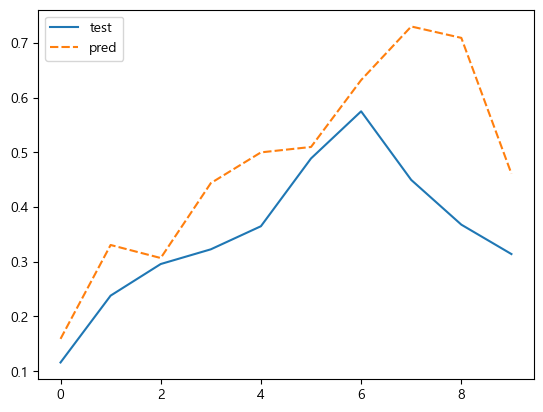

In [104]:
sns.lineplot(df_plot)